<a href="https://colab.research.google.com/github/JannM7/ProyectoColaboratorySena/blob/main/Analsis_DataSet_SENA_TalentoTech_31_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/JannM7/ProyectoColaboratorySena/main/Georeferenciaci_n_Centros_de_Aprendizaje_SENA_20240802.csv"
df = pd.read_csv(url)

In [3]:
df.columns

Index(['CENTRO_FORMACION', 'CODIGO_CENTRO', 'LATITUD', 'LONGITUD',
       'GEORREFERENCIACION', 'NOMBRE_REGIONAL', 'CODIGO_REGIONAL',
       'NOMBRE_DEPARTAMENTO', 'CODIGO_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
       'CODIGO_MUNICIPIO'],
      dtype='object')

In [4]:
registros_con_comillas_dobles = df['CENTRO_FORMACION'].str.contains('"').sum()
registros_con_comillas_simples = df['CENTRO_FORMACION'].str.contains("'").sum()
total_registros_con_comillas = registros_con_comillas_dobles + registros_con_comillas_simples

print(f'Numero de total de registros con comillas simples o dobles: {total_registros_con_comillas}')

Numero de total de registros con comillas simples o dobles: 0


In [5]:
registros_con_comas = df['CENTRO_FORMACION'].str.contains(',').sum()
print(f'Numero de total de registros con comas: {registros_con_comas}')

Numero de total de registros con comas: 1


In [6]:
df['CENTRO_FORMACION'] = df['CENTRO_FORMACION'].str.replace(',', '').str.replace("'",'')


In [7]:
registros_con_punto_y_comas = df['CENTRO_FORMACION'].str.contains(';').sum()
print(f'Numero de total de registros con punto y comas: {registros_con_punto_y_comas}')

Numero de total de registros con punto y comas: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     118 non-null    object 
 1   CODIGO_CENTRO        118 non-null    int64  
 2   LATITUD              118 non-null    float64
 3   LONGITUD             118 non-null    float64
 4   GEORREFERENCIACION   118 non-null    object 
 5   NOMBRE_REGIONAL      118 non-null    int64  
 6   CODIGO_REGIONAL      118 non-null    object 
 7   NOMBRE_DEPARTAMENTO  118 non-null    object 
 8   CODIGO_DEPARTAMENTO  118 non-null    int64  
 9   NOMBRE_MUNICIPIO     118 non-null    object 
 10  CODIGO_MUNICIPIO     118 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 10.3+ KB


In [9]:
df.describe()

,CODIGO_CENTRO,LATITUD,LONGITUD,NOMBRE_REGIONAL,CODIGO_DEPARTAMENTO,CODIGO_MUNICIPIO
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9344.101695,5.488609,-74.565154,40.991525,33.754237,63.601695
std,168.158980,2.999890,2.202978,31.301264,30.047238,181.361901
min,9101.000000,-4.210950,-81.701032,5.000000,5.000000,1.000000
25%,9209.250000,4.078250,-75.650750,11.000000,11.000000,1.000000
50%,9306.500000,4.871518,-74.792128,25.000000,19.000000,1.000000
75%,9522.500000,6.665545,-73.647250,68.000000,53.500000,1.000000
max,9549.000000,12.578130,-67.485291,99.000000,99.000000,893.000000


In [10]:
num_registros = df.shape[0] #crea una tupla con el numero de registros
print(f'Numero de registros: {num_registros}')

Numero de registros: 118


Todas las filas del conjunto de datos contienen valores y no presentan datos nulos

In [11]:
print(df.isnull().sum())

CENTRO_FORMACION       0
CODIGO_CENTRO          0
LATITUD                0
LONGITUD               0
GEORREFERENCIACION     0
NOMBRE_REGIONAL        0
CODIGO_REGIONAL        0
NOMBRE_DEPARTAMENTO    0
CODIGO_DEPARTAMENTO    0
NOMBRE_MUNICIPIO       0
CODIGO_MUNICIPIO       0
dtype: int64


In [12]:
duplicados_centro_de_formacion = df[df.duplicated(subset = ['CODIGO_CENTRO'])]
print('Filas con "CENTRO_FORMACION" duplicados')
print(duplicados_centro_de_formacion)

Filas con "CENTRO_FORMACION" duplicados
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
111            CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA           9518   
112  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   
113  CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   
114  CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...           9547   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
117  CENTRO DE PRODUCCION Y TRANSFORMACION AGROINDU...           9531   

       LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
111   0.505059 -76.501705   POINT (-76.501705 0.505059)               86   
112  12.576799 -81.701032  POINT (-81.701032 12.576799)               88   
113  -4.210806 -69.945538  POINT (-69.945538 -4.210806)               91   
114   3.874345 -67.921817   POINT (-67.921817 3.874345)               94   
116   1.249076 -70.235523   POINT (-70.235523 1.249076)             

In [13]:
codigo_buscar = 9548
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
98   CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
98   1.249076 -70.235523  POINT (-70.235523 1.249076)               97   
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
98   REGIONAL VAUPES              VAUPES                   97   
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
98              MITU                 1  
116             MITU                 1  


In [14]:
duplicados = df[df.duplicated()]
print(duplicados)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
116             MITU                 1  


In [15]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     117 non-null    object 
 1   CODIGO_CENTRO        117 non-null    int64  
 2   LATITUD              117 non-null    float64
 3   LONGITUD             117 non-null    float64
 4   GEORREFERENCIACION   117 non-null    object 
 5   NOMBRE_REGIONAL      117 non-null    int64  
 6   CODIGO_REGIONAL      117 non-null    object 
 7   NOMBRE_DEPARTAMENTO  117 non-null    object 
 8   CODIGO_DEPARTAMENTO  117 non-null    int64  
 9   NOMBRE_MUNICIPIO     117 non-null    object 
 10  CODIGO_MUNICIPIO     117 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 11.0+ KB


In [16]:
df_sin_duplicados.columns

Index(['CENTRO_FORMACION', 'CODIGO_CENTRO', 'LATITUD', 'LONGITUD',
       'GEORREFERENCIACION', 'NOMBRE_REGIONAL', 'CODIGO_REGIONAL',
       'NOMBRE_DEPARTAMENTO', 'CODIGO_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
       'CODIGO_MUNICIPIO'],
      dtype='object')

In [17]:
numero_centros_por_departamento = df_sin_duplicados.groupby('NOMBRE_DEPARTAMENTO')['CENTRO_FORMACION'].count()

numero_centros_ordenados = numero_centros_por_departamento.sort_values(ascending = False)
print(numero_centros_ordenados)

NOMBRE_DEPARTAMENTO
ANTIOQUIA                   20
BOGOTA D.C.                 17
CAUCA                        7
VALLE DEL CAUCA              5
ATLANTICO                    5
HUILA                        4
CALDAS                       4
NARINO                       4
BOYACA                       4
BOLIVAR                      4
SANTANDER                    3
META                         3
CESAR                        3
RISARALDA                    3
CORDOBA                      3
CUNDINAMARCA                 3
PUTUMAYO                     2
NORTE DE SANTANDER           2
SAN ANDRES Y PROVIDENCIA     2
AMAZONAS                     2
MAGDALENA                    2
LA GUAJIRA                   2
GUAINIA                      2
CAQUETA                      2
VICHADA                      2
QUINDIO                      1
CHOCO                        1
CASANARE                     1
SUCRE                        1
TOLIMA                       1
ARAUCA                       1
VAUPES             

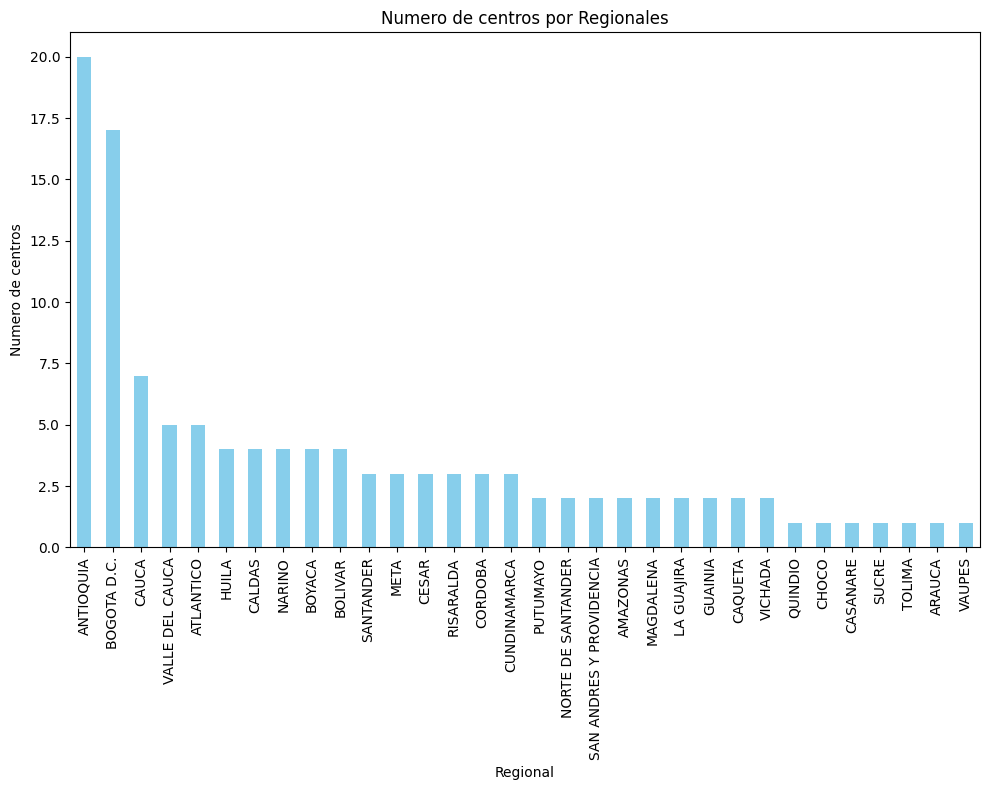

In [21]:
plt.figure(figsize = (10,8))
numero_centros_ordenados.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Regional')
plt.ylabel('Numero de centros')
plt.title('Numero de centros por Regionales')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**Distribucion por Regionales**

*   La grafica de barras muestra la cantidad de centros de aprendizaje por regionales. Se observa una mayor concentracion en regionales como Antioquia o Bogota D.C., lo que sugiere una tendencia a concentrar mas centros en areas mas





In [22]:
pip install folium

In [24]:
import folium
mapa = folium.Map(location = [4.5709, -74.2973], zoom_start = 5)
for index, row in df_sin_duplicados.iterrows():
  folium.Marker([row['LATITUD'], row['LONGITUD']], popup = row['CENTRO_FORMACION']).add_to(mapa)

mapa

**Conclusiones generales**

*Integridad y Limpieza de Datos:* El conjunto de datos inicial contiene duplicados y no contiene valores nulos, lo cual es crucial para asegurar la calidad y precision de cualquier analisis posterior. La estandarizacion ayuda a mantener la consistencia en los datos y facilita su uso en analisis y visualizaciones.

*Numero de centros por Regional:* El agrupamiento y conteo de centros por regionales muestra una distribucion desigual, con algunas regiones teniendo una mayor cantidad de centros que otros. Esto podria reflejar diferencias en la demanda de formacion profesional, la densidad de poblacion, o politicas regionales de educacion y formacion. El analisis de los datos muestra que algunas regiones tienen mayor concentracion de centros de formacion. Estos departamentos podrían ser el foco de futuros estudios para entender las razones detras de esta concentracion.

*Visualización de la Distribución por Región:* La grafica muestra la distribución de los centros de formación por región. Las regiones con mayor cantidad de centros podrian ser las mas industrializadas o aquellas con mayor poblacion estudiantil.

*Distribución Geografica de los centros de formación:* La visualización de los datos en un mapa interactivo con la biblioteca Folium muestra la dispersión geografica de los centros de formación. Esto puede ayudar a identificar areas con alta concentración de centros, asi como regiones que pueden estar desatentidas.

*Validación Final:* La validación final asegura que despues de la limpieza de datos y estandirazación, no queden valores nulos ni duplicados, garantizando asi la calidad de los datos de cualquier analisis adicional.


**Implicaciones Practicas**

Planificación y Distribución de recursos:

*   Las autoridades del SENA y otros organismos educativos pueden utilizar esta información para planificar la distribución de recursos y la apertura de nuevos centros de formación en regiones que actualmente estan desatentidas.
*   La identifación de areas con alta concentración de centros puede ayudar a redistribuir o expandir programas de formación para equilibrar la oferta educativa en todo el país.



**Recomendaciones Futuras**


Analisís Demográficos y Socioeconómicos

*   Realizar analisis adicionales que correlacionen la distribución de los centros con variables demograficas y socioeconomicas, como población, tasa de desempleo y nivel educativo de la región.




Estudio de Demanda:

*   Investigar la demanda de formación profesional en diferentes regiones para ajustar la oferta de cursos y programas a las necesidades locales.

